# 0. 모듈 불러오기!

In [156]:
# 기본 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load_diabetes 데이터 호출 모듈
from sklearn.datasets import load_diabetes #diabetes 데이터 불러오기

# 데이터 호출 도우미 모듈
import os
from os.path import join

# 데이터 분리 모듈
from sklearn.model_selection import train_test_split # train, test 데이터 분리하기

# 데이터 학습
from sklearn.linear_model import LinearRegression # 로지스틱 회귀분석

# 데이터 평가
from sklearn.metrics import mean_squared_error # 손실함수 MSE

# 1. 당뇨병 수치를 맞춰보기!

## 1.1 데이터 가져오기!


In [157]:
diabetes = load_diabetes() # 데이터 불러오기
diabetes.keys() # 데이터 키 종류 확인하기

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [158]:
df_X = diabetes.data # feature 데이터 저장하기
df_X.shape

(442, 10)

In [159]:
df_y = diabetes.target # label 데이터 저장하기
df_y.shape

(442,)

In [160]:
feature_names = diabetes.feature_names # feature 데이터 이름 확인하기
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [161]:
print(diabetes.DESCR) # 설명 확인하기

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Feature 정보
1. age: 나이
2. sex: 성별
3. bmi: 체질량 지수
4. bp: 평균 혈압
5. s1: tc, 총 혈청 콜레스테롤
6. s2: ldl, 저밀도 지질단백질
7. s3: hdl, 고밀도 지질단백질
8. s4: tch, 총 콜레스테롤 / HDL
9. s5: ltg, 아마도 혈청 트리글리세리드 수준의 로그일 것이다.
10. s6: glu, 혈당치

Label 정보  
1년 후 질병 진행에 대한 정량적 척도

## 1.2 모델에 입력할 데이터 X 준비하기!

In [162]:
type(df_X) # 데이터 타입 확인하기
# df_X = np.array(df_X) # 이미 numpy array로 변환되어 있었음

numpy.ndarray

## 1.3 모델에 예측할 데이터 y 준비하기!

In [163]:
type(df_y) # 데이터 타입 확인하기
# df_y = np.array(df_y) # 이미 numpy array로 변환되어 있었음

numpy.ndarray

## 1.4 train 데이터와 test 데이터로 분리하기!


In [164]:
# train, test 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=9)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


## 1.5 모델 준비하기!

In [165]:
# W, b 초기값 할당해보기
W = np.random.rand(df_X.shape[1]) # feature 개수만큼 random 수 생성하기
b = np.random.rand()
print('W:', W)
print('b:', b)

W: [0.3975499  0.46904987 0.57469774 0.4243031  0.5564203  0.94458468
 0.37374525 0.49374618 0.87164937 0.05138845]
b: 0.19285855262711782


In [166]:
def model(X, W, b): # 선형 회귀 분석
    y_pred = 0 # label 예측 변수
    
    for i in range(len(W)):
        y_pred += X[:, i] * W[i] # + WX
        
    y_pred += b # + b
    return y_pred

In [167]:
# 학습하기 전 예측값 구해보기
y_pred = model(X_train, W, b)
print('y_train:', y_train[:5], 'y_pred:', y_pred[:5], sep='\n')

y_train:
[270. 306. 178. 109. 180.]
y_pred:
[ 0.30339877  0.45497536 -0.0192586   0.26689344  0.42253768]


## 1.6 손실함수 loss 정의하기!

In [168]:
def MSE(y_test, y_pred): # MSE
    mse = ((y_test - y_pred) ** 2).mean() # 편차의 제곱의 평균
    return mse

In [169]:
def loss(X, W, b, y): # 손실 함수
    y_pred = model(X, W, b) # label 예측값 계산하기
    L = MSE(y_pred, y) # MSE 계산하기
    return L

In [170]:
# 학습하기 전 loss값 구해보기
W = np.random.rand(df_X.shape[1])
b = np.random.rand()
loss(df_X, W, b, df_y)

28984.61418907599

## 1.7 기울기를 구하는 gradient 함수 구현하기!

In [171]:
def gradient(X, W, b, y): # 경사
    M = len(X) # 데이터의 개수
    y_pred = model(X, W, b) # 예측값 계산하기
    dW = 1 / M * 2 * X.T.dot(y_pred - y) # W 경사 계산하기
    db = 2 * (y_pred - y).mean() # b 경사 계산하기
    return dW, db

In [172]:
# 경사 구해보기
W = np.random.rand(df_X.shape[1])
b = np.random.rand()
dW, db = gradient(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.36918515 -0.3099584  -4.28775252 -3.22507422 -1.54555806 -1.26868542
  2.88835965 -3.14570903 -4.13617338 -2.79482599]
db: -302.3768864376316


## 1.8 하이퍼 파라미터인 학습률 설정하기!

In [173]:
LEARNING_RATE = 0.0001 # 학습률 설정하기

## 1.9 모델 학습하기!

In [174]:
# feature와 label의 상관계수 파악하기
pd.DataFrame(np.concatenate((df_X, df_y.reshape(-1, 1)), axis=1), columns=[*feature_names, 'y']).corr()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [175]:
del_icol = [1] # 제거할 feature index 지정하기
X_train = np.delete(X_train, del_icol, axis=1) # del_icol 제거하기
X_train.shape

(353, 9)

In [176]:
def Learn(LEARNING_RATE = 0.3, rate_down=True, n = 10000):
    '''
    LEARNING_RATE(초기 학습률): 0.3
    rate_down(학습률 하강): True
    n(학습 횟수): 10000
    '''
    W = np.random.rand(X_train.shape[1]) # 초기값 설정하기
    b = np.random.rand() # 초기값 설정하기
    losses = [] # loss 저장 변수
    losses.append(loss(X_train, W, b, y_train)) # 최초 loss
    print(f'최초 Iteration 0 : Loss {losses[-1]:0.0f}')

    for i in range(1, n + 1): # n회 만큼 학습하기
        dW, db = gradient(X_train, W, b, y_train) # 경사 구하기
        W -= LEARNING_RATE * dW # W 업데이트하기
        b -= LEARNING_RATE * db # b 업데이트하기
        if rate_down: # 학습률 하강시키기
            LEARNING_RATE /= 1.0001
        L = loss(X_train, W, b, y_train) # loss 계산하기
        losses.append(L) # loss 저장하기
        
        if i % (n / 10) == 0: # 1000회마다 진행률 표시하기
            print(f'  Iteration {i} : Loss {losses[-1]:0.0f}')
        # loss값의 변화율이 매우 낮으면 break
        if len(losses) > 1 and (losses[-2] / losses[-1]) < 1.000001:
                break
                
    print(f'최후 Iteration {i} : Loss {losses[-1]:0.0f}')
    return losses, W, b # losses, W, b return 받기

## 1.10 test 데이터에 대한 성능 확인하기!

In [177]:
X_test = np.delete(X_test, del_icol, axis=1) # del_icol 제거하기
X_test.shape

(89, 9)

In [178]:
losses, W, b = Learn() # 학습된 W, b 받아오기

최초 Iteration 0 : Loss 29444
  Iteration 1000 : Loss 3279
  Iteration 2000 : Loss 3210
  Iteration 3000 : Loss 3198
최후 Iteration 3608 : Loss 3195


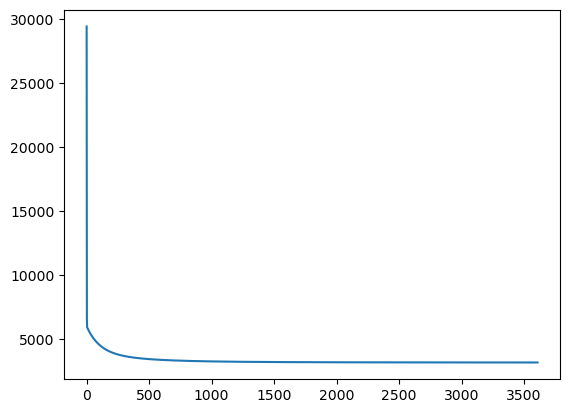

In [179]:
plt.plot(losses) # loss 그래프 확인하기
plt.show()

In [180]:
y_pred = model(X_test, W, b) # y_pred 받아오기

print(f'test 데이터에 대한 model 성능(MSE): {MSE(y_test, y_pred):.0f}') # 성능 확인하기

test 데이터에 대한 model 성능(MSE): 2183


## 1.11 정답 데이터와 예측한 데이터 시각화하기!

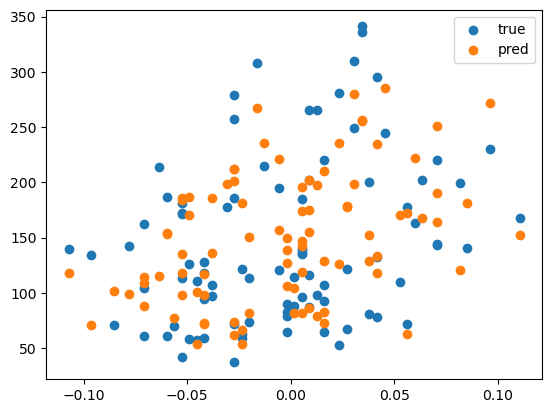

In [181]:
# y_test와 y_pred의 값들이 얼마나 가까이 있는지 확인하기
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], y_pred, label="pred")
plt.legend()
plt.show()

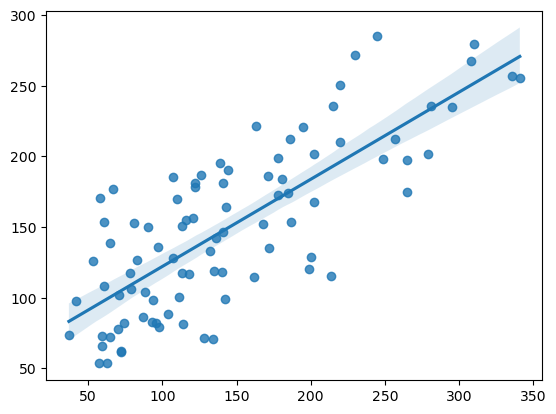

In [182]:
# y_test와 y_pred의 상관 관계 파악하기
sns.regplot(x=y_test, y=y_pred)
plt.show()

In [183]:
np.corrcoef(y_test, y_pred) # 상관 계수 구하기

array([[1.        , 0.77692989],
       [0.77692989, 1.        ]])

실제값과 예측값의 상관계수: 0.77

# 2. 자전거 대여수 맞춰보기!

## 2.1 데이터 가져오기!

In [184]:
train_origin = pd.read_csv('~\OneDrive - 수원대학교\Office\AIFFEL\Workspace\\0\[E-02]\data\\train.csv') # 원본 데이터 저장하기
train = train_origin.copy()

In [185]:
train.shape

(10886, 12)

In [186]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<p style="font-size:20px">Data Fields</p>

1. datetime: hourly date + timestamp
2. season: 1=봄, 2=여름, 3=가을, 4=겨울
3. holiday: 1=주말을 제외한 국경일 등의 휴일, 0=휴일이 아닌 날
4. workingday: 1=주말 및 휴일이 아닌 주중, 0=주말 및 휴일
5. weather:  
    1=맑음, 약간 구름 낀 흐림  
    2=안개, 안개 + 흐림  
    3=가벼운 눈, 가벼운 비 + 천둥  
    4=심한 눈/비, 천둥/번개
6. temp: 온도(섭씨)
7. atemp: 체감온도(섭씨)
8. humidity: 상대습도
9. windspeed: 풍속
10. casual: 사전에 등록되지 않은 사용자가 대여한 횟수
11. registered: 사전에 등록된 사용자가 대여한 횟수
12. count: 대여 횟수

In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [188]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<p style="font-size:20px">데이터 전처리</p>

info를 살펴본 결과 null값은 없지만 object형인 datatime 특성이 있다.  
datetime은 년-월-일 시:분:초 문자 형식으로 되어 있어서 각 단위를 분리해서 6개의 특성으로 나눠야 한다.  
나누기 위해서는 datetime 타입으로 변경해야한다.

## 2.2 datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기!

In [189]:
# datetime 특성을 datetime 타입으로 변환하기
train['datetime'] = pd.to_datetime(train['datetime'])

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [190]:
# datetime 특성을 각 시간 단위로 분리하기
train['year'] = pd.to_datetime(train['datetime']).dt.year
train['month'] = pd.to_datetime(train['datetime']).dt.month
train['day'] = pd.to_datetime(train['datetime']).dt.day
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
train['minute'] = pd.to_datetime(train['datetime']).dt.minute
train['second'] = pd.to_datetime(train['datetime']).dt.second

In [191]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## 2.3 year, month, day, hour, minute, second 데이터 개수 시각화하기!

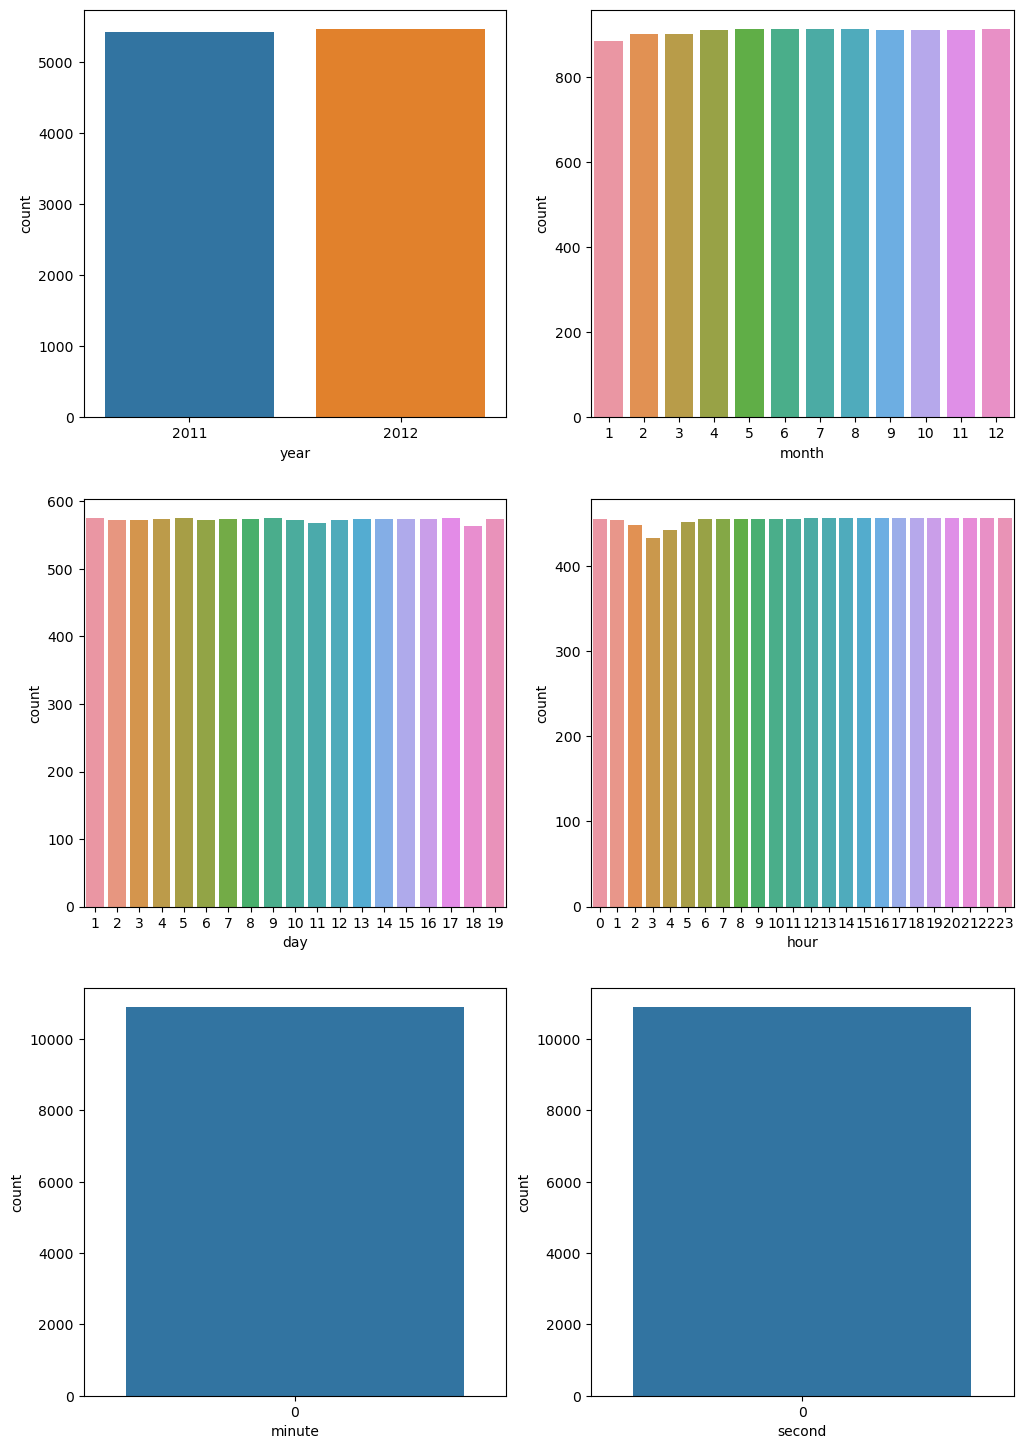

In [192]:
# 각 시간 단위마다 countplot 그려보기
fig = plt.figure(figsize=(12, 18))
plt.subplot(321)
sns.countplot(x=train['year'])
plt.subplot(322)
sns.countplot(x=train['month'])
plt.subplot(323)
sns.countplot(x=train['day'])
plt.subplot(324)
sns.countplot(x=train['hour'])
plt.subplot(325)
sns.countplot(x=train['minute'])
plt.subplot(326)
sns.countplot(x=train['second'])
plt.show()

## 2.4 X, y 컬럼 선택 및 train/test 데이터 분리하기!

시각화 결과 minute, second 특성은 단일값이므로 삭제한다.  

datetime 특성은 이제 필요 없으므로 삭제해야 한다.  

또한 casual 특성은 "사전에 등록하지 않은 사용자가 대여한 횟수"이고, registered 특성은 "사전에 등록된 사용자가 대여한 횟수"이며, casual + registered = count이기 때문에  
casual과 registered 특성이 따로 필요하지는 않다.  
애초에 test 데이터셋에는 casual, registered 특성은 존재하지도 않으므로 예측에 사용될 수 없다.  

In [193]:
train = train.drop(['datetime', 'casual', 'registered', 'minute', 'second'], axis=1)

train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


모델을 학습하기 전에 해야될 사항이 2가지가 있다.
1. label의 정규분포화
2. categorical feature들의 원핫 인코딩

우선 label의 분포를 살펴보자.

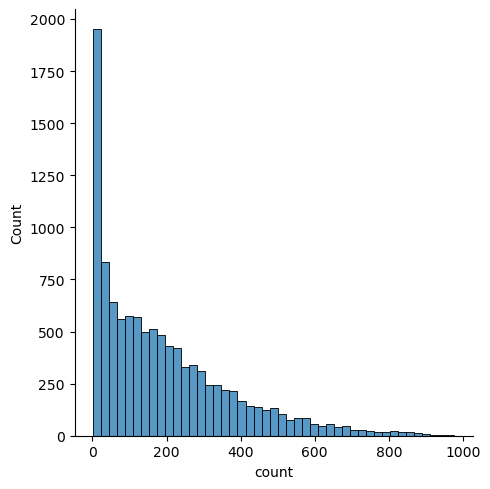

In [194]:
sns.displot(train['count'])

무슨 분포인지는 모르겠지만 정규분포는 아니다. 따라서 log를 씌워서 정규분포와 가까운 모양으로 만들어야 한다.

In [195]:
train['count'] = np.log1p(train['count'])

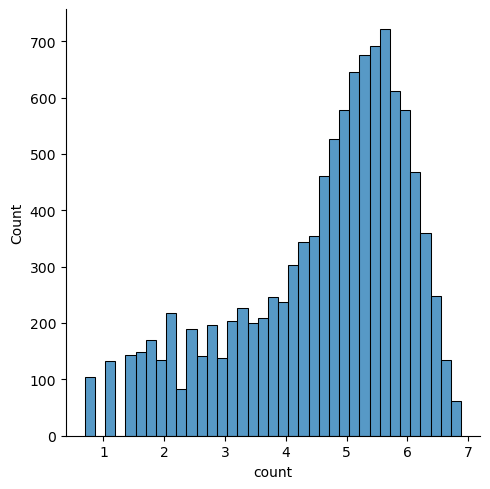

In [196]:
sns.displot(train['count'])

이번에는 categorical feature들을 원핫 인코딩하기 위해 plot을 그려보자.

season, holiday, workingday, weather, year, month, day, hour 8개의 특성이 카테고리 타입이므로 이 특성들을 원핫 인코딩한다.

In [197]:
train = pd.get_dummies(train, columns=['season', 'holiday', 'workingday', 'weather',
                                       'year', 'month', 'day', 'hour'])
train.shape

(10886, 74)

In [198]:
# X, y 분리하기
X = train.drop(['count'], axis=1)
y = train['count']
X.head()

,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,14.395,81,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9.84,14.395,75,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.84,14.395,75,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## 2.5 LinearRegression 모델 학습하기!

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8708, 73) (2178, 73) (8708,) (2178,)


In [200]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

## 2.6 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산하기!

In [201]:
y_pred = lin_reg.predict(X_test)

In [202]:
# 이전에 y에 log값을 씌워서 scale이 낮아져 있으므로 다시 exp를 씌워서 실제값으로 바꿔준다
y_test = np.expm1(y_test)
y_pred = np.expm1(y_pred)

In [203]:
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 8686.839619116252


In [204]:
rmse = mse ** 0.5
print('RMSE:', rmse)

RMSE: 93.20321678523898


## 2.7 x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기!

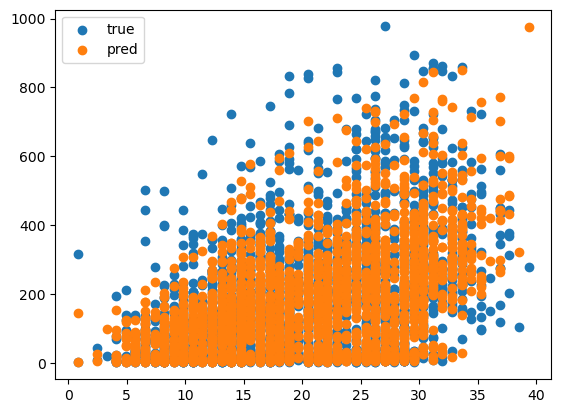

In [205]:
plt.scatter(X_test.loc[:, 'temp'], y_test, label="true")
plt.scatter(X_test.loc[:, 'temp'], y_pred, label="pred")
plt.legend()
plt.show()

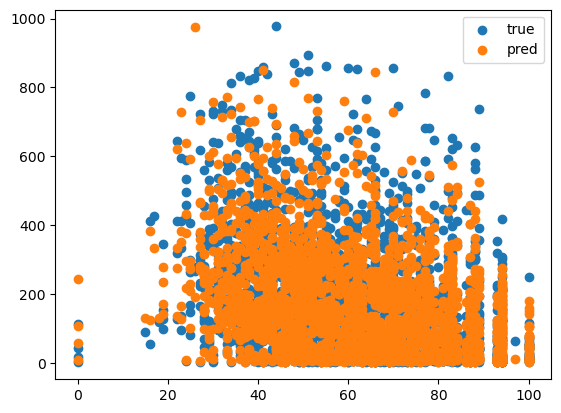

In [206]:
plt.scatter(X_test.loc[:, 'humidity'], y_test, label="true")
plt.scatter(X_test.loc[:, 'humidity'], y_pred, label="pred")
plt.legend()
plt.show()

시각화 결과 꽤 비슷한 분포를 보이고 있는 것 같다.

# 3 회고하기!

## 3.1 이번 프로젝트에서 어려웠던 점

Exploration에서 배운 것 이외의 것들을 찾아보지 않으면 목표 점수를 채울 수가 없던 점이 어려웠다.

## 3.2 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

알아낸 점은 y값을 함부로 바꾸면 안되는 건 줄 알았는데 학습할 때 log1p를 씌우고 학습이 끝나면 다시 exp1m을 씌우는 방식을 써도 된다는 것이다.  
모호한 점은 상관계수가 낮은 특성을 지워도 손실함수값이 낮아지지 않았다는 점이다.

## 3.3 루브릭 평가 지표를 맞추기 위해 시도한 것들

1. 당뇨병 데이터  
    직접 학습시키는 코드에서 1회 학습할 때마다 학습률을 서서히 줄여나가는 방식을 시도해봤다.  
    처음에는 global minimum이 있는 라인쪽으로 가기 위해 학습률을 크게 주고  
    라인쪽에 무사히 빠지고 난 후에는 학습률을 낮춰서 안정적으로 minimum에 빠지지 않을까  
    라는 생각으로 기능을 구현했다.  

    손실함수값의 변동이 거의 없을 때 break를 하는 기능도 구현해봤다.  
    더 이상 손실함수값이 나아지지 않는데도 계속 학습시키면 train 데이터에 너무 집중해서  
    test 데이터에는 잘 맞지 않게 되는 overfitting 문제가 발생할 것을 대비한 기능이다.

2. 자전거 데이터  
    y값을 그래프로 그려봤더니 오른쪽으로 꼬리가 긴 분포여서 혹시 이것을 조정할 수 있지 않을까 싶어서  
    구글에 검색해 본 결과 학습하기 전에 log를 씌우고 학습이 끝난 후 exp1m을 씌워서 낮아진 scale을  
    다시 실제값에 맞게 되돌려 주면 오히려 더 학습이 잘된다는 사실을 알게 되서 직접 적용시켰다.  
    하지만 성능은 그다지 오른 것 같지는 않았다.  
    
    값의 scale에 따라 가중치가 크게 영향을 받는 현상을 없애기 위해 category 특성에 원핫 인코딩도 적용해봤다.  
    그러자 갑자기 특성이 너무 많이 생겨서 자료를 보기가 불편해졌다. 그래도 손실함수값은 크게 낮출 수 있었다.

## 3.4 만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정

루브릭 평가 지표
* 당뇨병 데이터 MSE 3000 이하: 내 점수 2183
* 자전거 데이터 RMSE 150 이하: 내 점수 94  

두 목표 모두 달성했다.  
당뇨병 데이터는 학습률을 점점 낮추는 방식이 효과가 좋았고  
자전거 데이터는 원핫 인코딩이 효과가 좋았다.

## 3.5 자기 다짐

지표를 맞추는데 욕심을 너무 부려서 시간이 많이 촉박했다.  
지표는 우선 커트라인만 딱 맞추고 마크다운을 좀 더 연습해야겠다고 생각했다.